In [1]:
import pandas as pd
df = pd.read_csv("marketing_data.csv")

In [2]:
df = df.dropna()

import re
df["Income"] = df["Income"].str.replace("$", "").str.replace(",","").astype(float)

<ipython-input-2-c1f912c142b3>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["Income"] = df["Income"].str.replace("$", "").str.replace(",","").astype(float)


In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

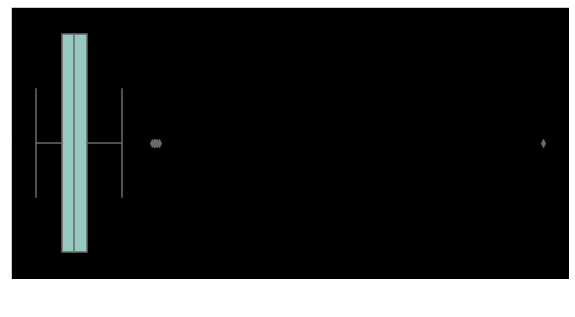

In [4]:
plt.figure(figsize=(10,5))
plt.style.use(["dark_background"])
sns.boxplot(x=df["Income"])
plt.show()

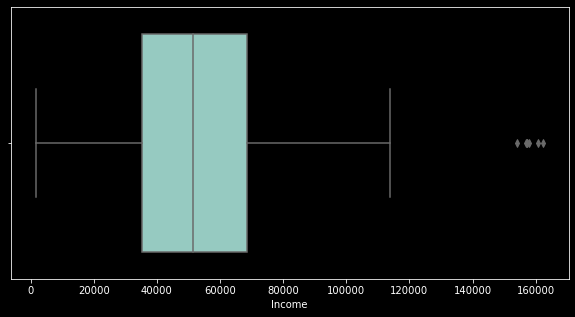

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64


In [5]:
df = df[df["Income"]<200000]

plt.figure(figsize=(10,5))
sns.boxplot(x=df["Income"])
plt.show()
print(df["Income"].describe())

In [6]:
dfa = df.rename(columns={"YearBirth":"Age"})
dfa["Age"] = 2021 - dfa["Age"]

In [7]:
dfa.head()

,id,Age,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,51,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,60,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,63,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,54,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,32,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


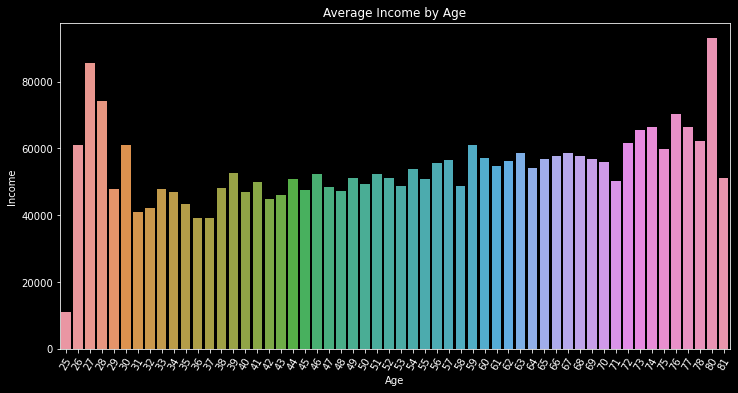

In [8]:
dfa = dfa[dfa["Age"]<101]
age = dfa.groupby("Age").Income.mean().reset_index()
age = age.sort_values("Age")

plt.figure(figsize=(12,6))
ax=plt.subplot(1,1,1)
sns.barplot(x=age.Age, y=age.Income)
plt.xticks(rotation=60)
plt.title("Average Income by Age")
plt.show()

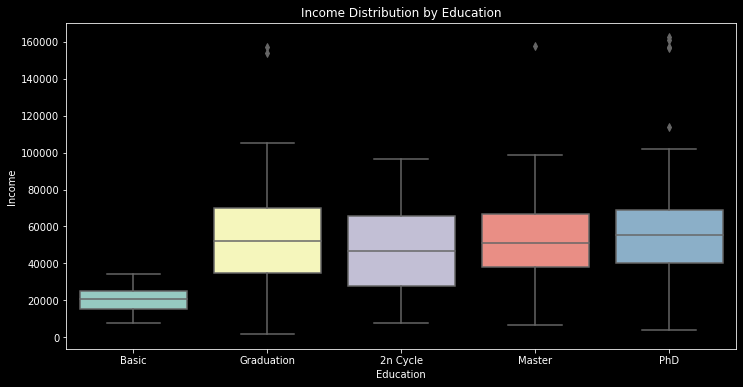

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df.Education, y=df.Income, order=["Basic", "Graduation", "2n Cycle", "Master", "PhD"])
plt.title("Income Distribution by Education")
plt.show()

<ipython-input-12-ba85d6b1983f>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dfc.hist(ax = ax);


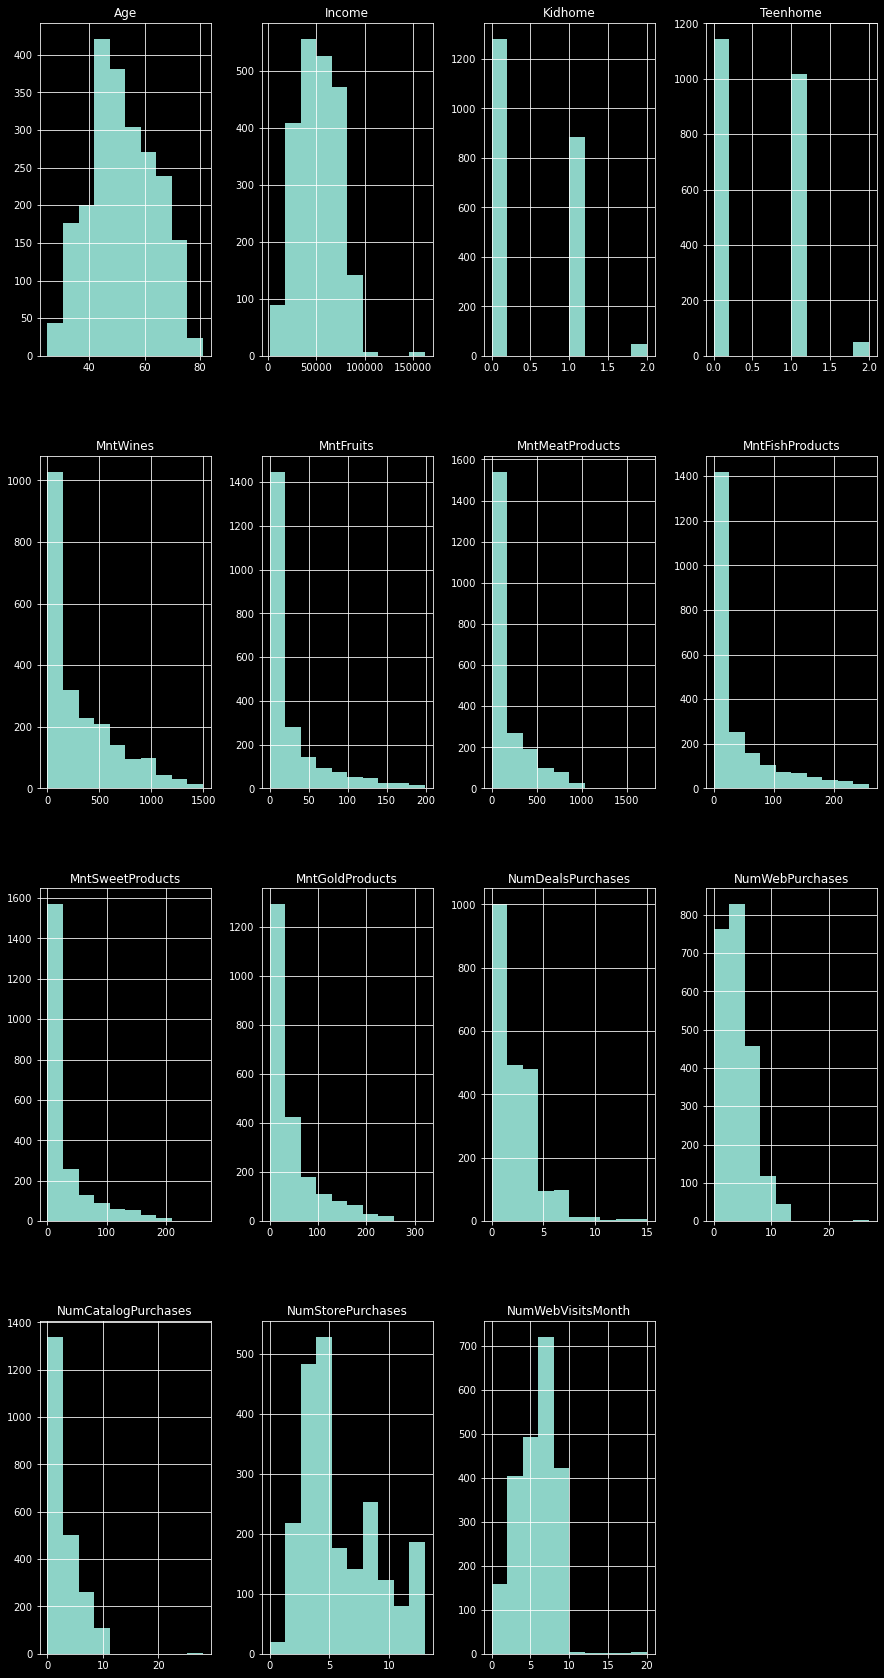

In [12]:
fig = plt.figure(figsize = (15,30))
ax = fig.gca()
dfc.hist(ax = ax);

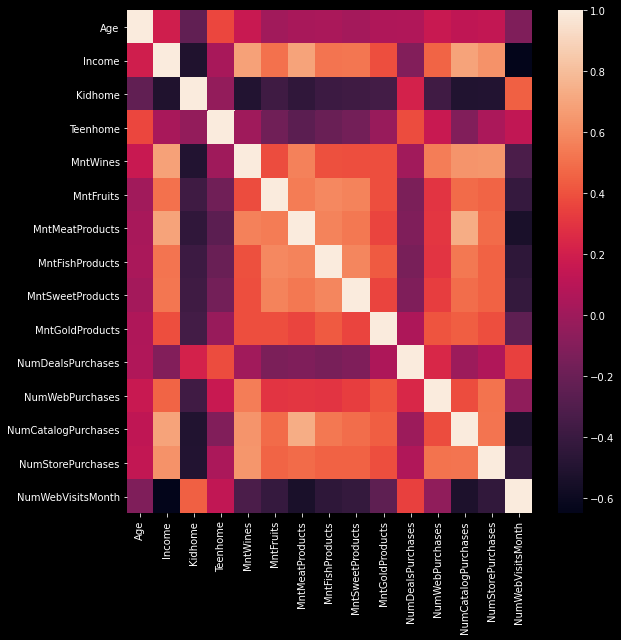

In [11]:
dfc = dfa.drop(columns=["id", "DtCustomer", "Recency", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "Response", "Complain"])

plt.figure(figsize=(9,9))
sns.heatmap(data=dfc.corr(), annot=False)
plt.tight_layout()
plt.show()

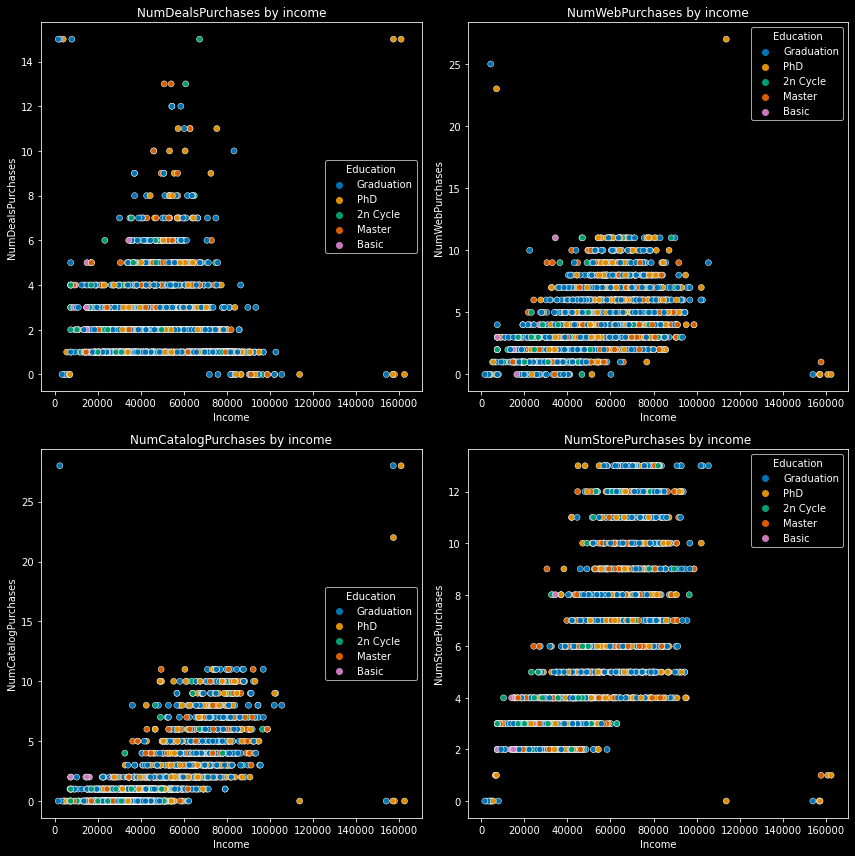

In [13]:
purchases = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]

plot = 0
fig = plt.figure(figsize=(12,12))

for x in range(4):
    plot += 1

    ax = plt.subplot(2, 2, plot)

    sns.scatterplot(x=dfa["Income"], y= dfa[purchases[x]], hue=dfa["Education"], palette="colorblind")
    plt.title(f"{purchases[x]} by income")

plt.tight_layout()
plt.show()

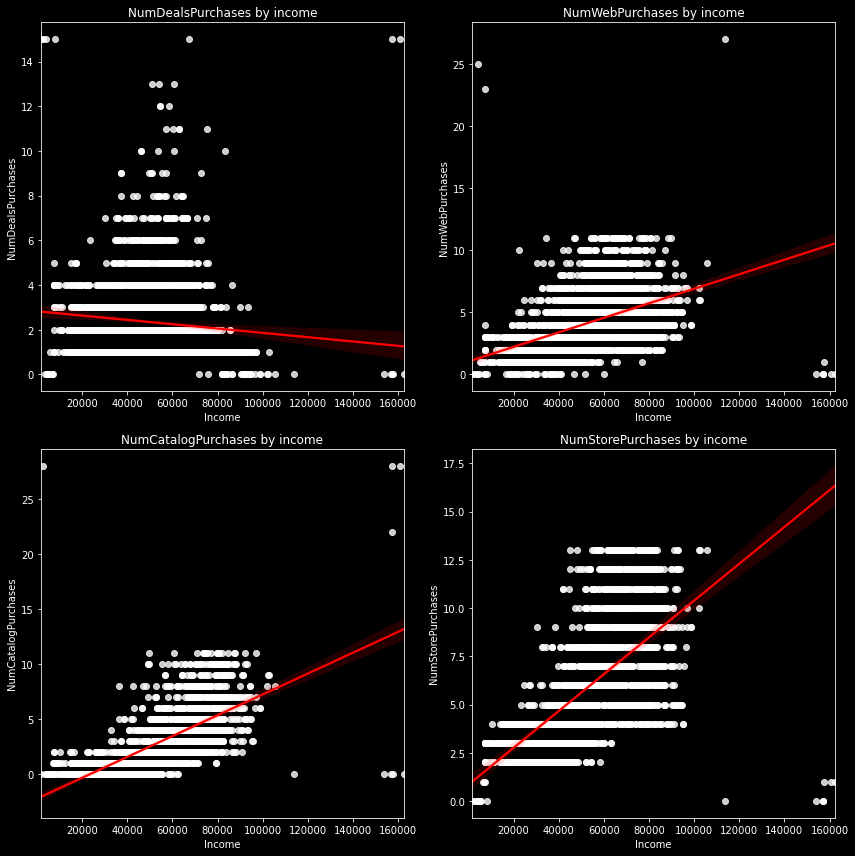

NumDealsPurchases shows a negative linear relationship while everything else show a strong positive one


In [14]:
fig = plt.figure(figsize=(12,12))

plot = 0
for x in range(4):
    plot += 1
    ax = plt.subplot(2, 2, plot)
    sns.regplot(x=dfa["Income"], y= dfa[purchases[x]], scatter_kws={"color":"white"}, line_kws={"color":"red"})
    plt.title(f"{purchases[x]} by income")

plt.tight_layout()
plt.show()
print("NumDealsPurchases shows a negative linear relationship while everything else show a strong positive one")

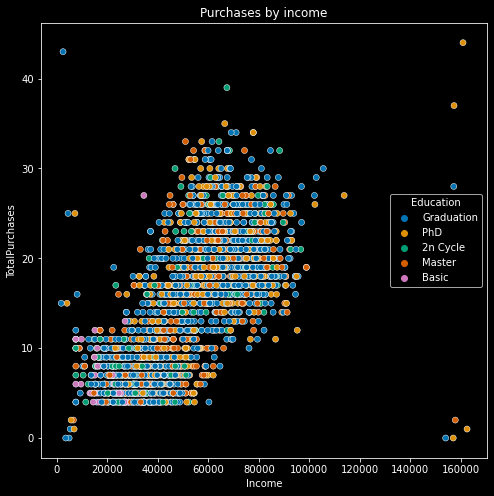

In [15]:
dfc["TotalPurchases"] = dfc[purchases[0]] + dfc[purchases[1]] + dfc[purchases[2]] + dfc[purchases[3]]

plt.figure(figsize=(8,8))
sns.scatterplot(x=dfc["Income"], y= dfc["TotalPurchases"], hue=dfa["Education"], palette="colorblind")
plt.title(f"Purchases by income")
plt.show()

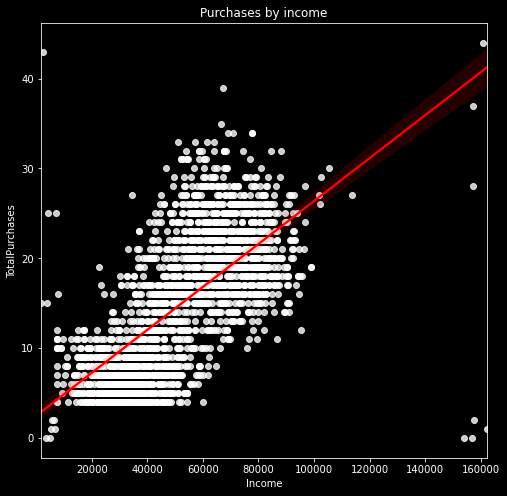

In [16]:
plt.figure(figsize=(8,8))
sns.regplot(x=dfc["Income"], y= dfc["TotalPurchases"], scatter_kws={"color":"white"}, line_kws={"color":"red"})
plt.title(f"Purchases by income")
plt.show()

In the last one we looked at purchase behavior by income. Now we will be looking into the relationship between income and the availability of a product.

In [17]:
dfc.head()

,Age,Education,MaritalStatus,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Country,TotalPurchases
0,51,Graduation,Divorced,84835.0,0,0,189,104,379,111,189,218,1,4,4,6,1,SP,15
1,60,Graduation,Single,57091.0,0,0,464,5,64,7,0,37,1,7,3,7,5,CA,18
2,63,Graduation,Married,67267.0,0,1,134,11,59,15,2,30,1,3,2,5,2,US,11
3,54,Graduation,Together,32474.0,1,1,10,0,1,0,0,0,1,1,0,2,7,AUS,4
4,32,Graduation,Single,21474.0,1,0,6,16,24,11,0,34,2,3,1,2,7,SP,8


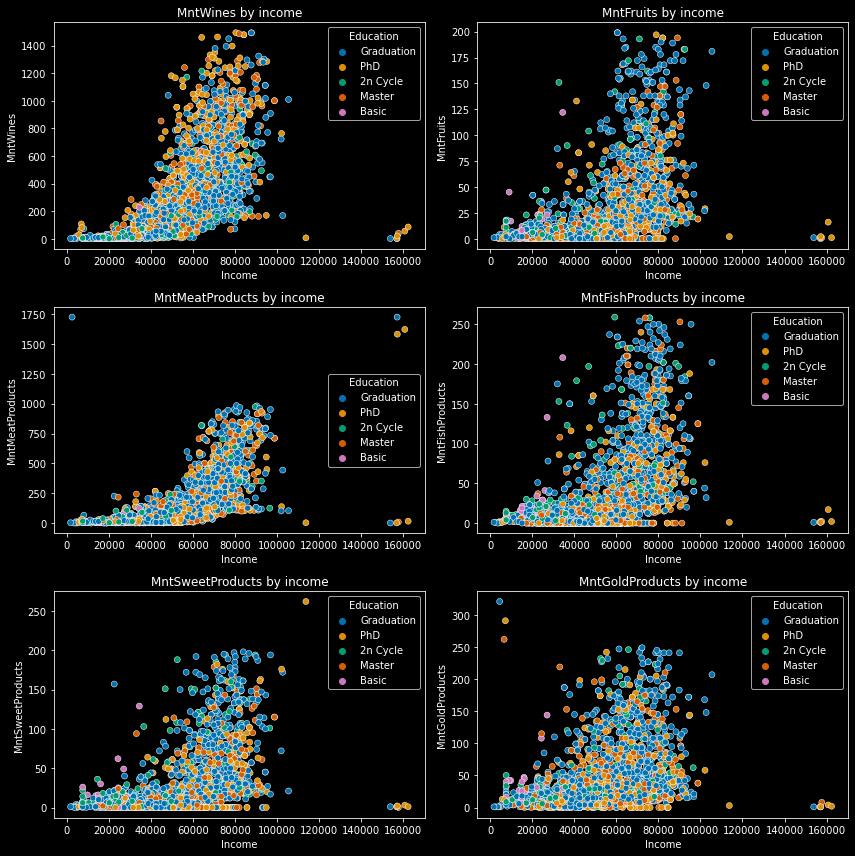

In [18]:
amounts = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProducts"]

plot = 0
fig = plt.figure(figsize=(12,12))

for x in range(6):
    plot += 1

    ax = plt.subplot(3, 2, plot)

    sns.scatterplot(x=df["Income"], y= df[amounts[x]], hue=dfa["Education"], palette="colorblind")
    plt.title(f"{amounts[x]} by income")

plt.tight_layout()
plt.show()

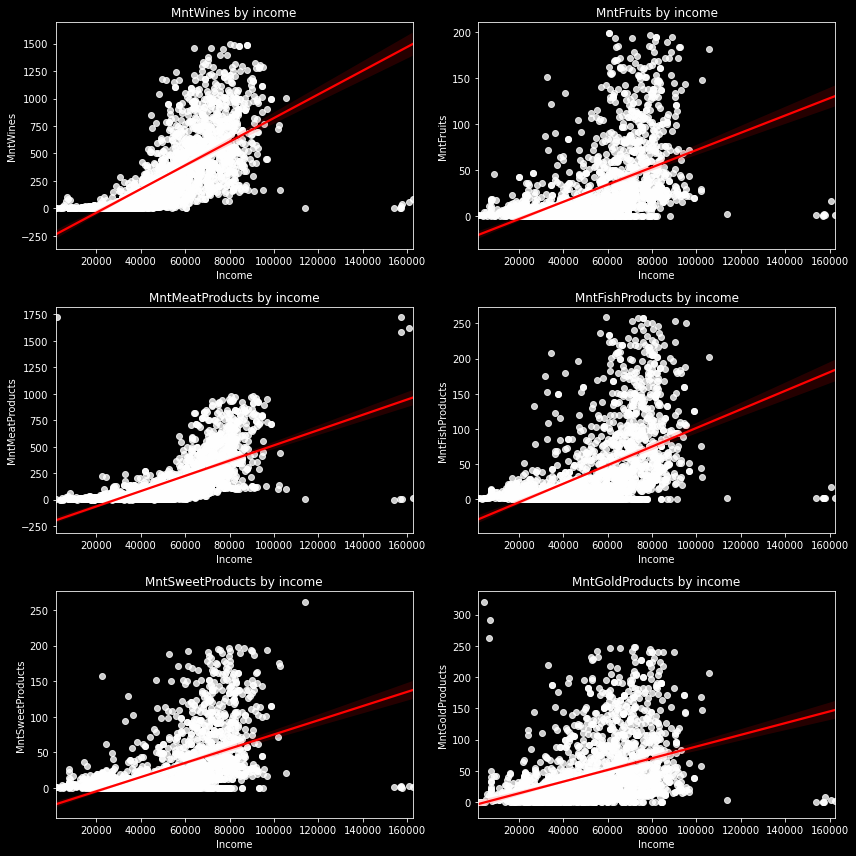

All show a positive linear relationship


In [20]:
fig = plt.figure(figsize=(12,12))

plot = 0
for x in range(6):
    plot += 1
    ax = plt.subplot(3, 2, plot)
    sns.regplot(x=df["Income"], y= df[amounts[x]], scatter_kws={"color":"white"}, line_kws={"color":"red"})
    plt.title(f"{amounts[x]} by income")

plt.tight_layout()
plt.show()
print("All show a positive linear relationship")

The charts below show purchase behavior by income for each Education cap in each type of product.

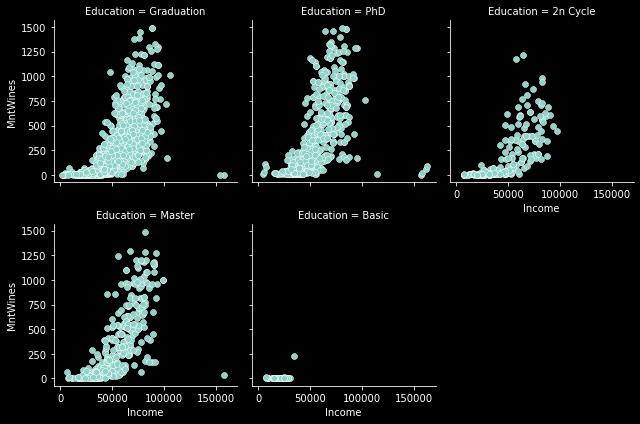

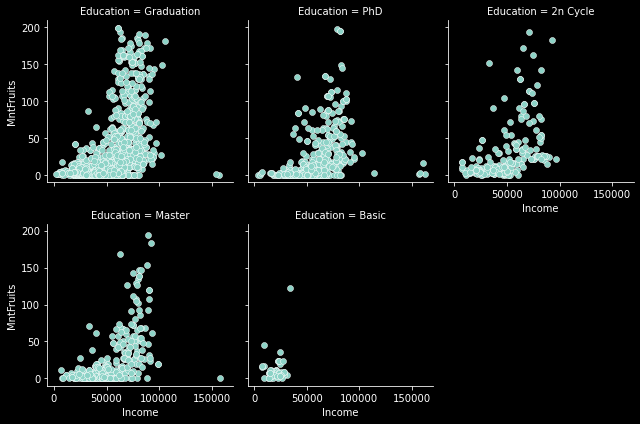

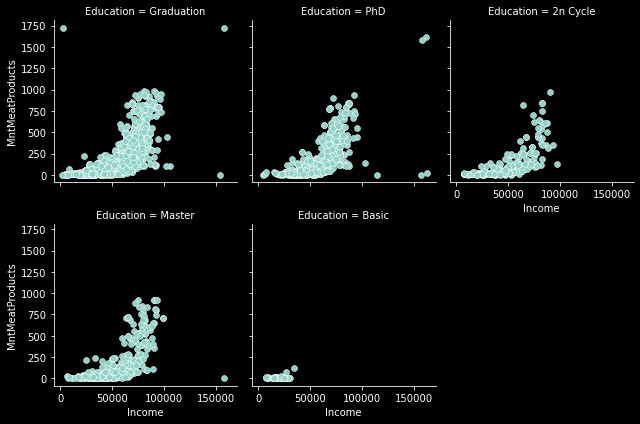

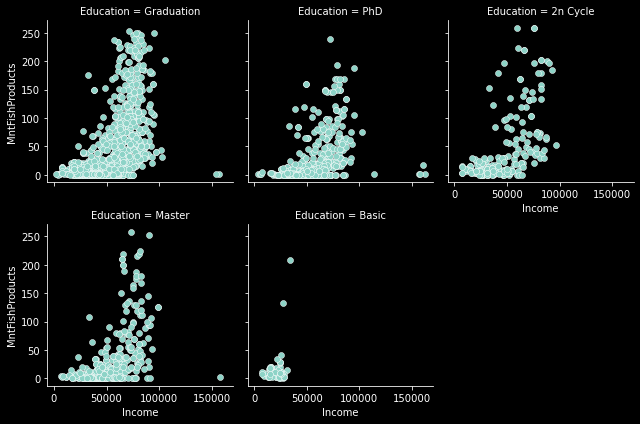

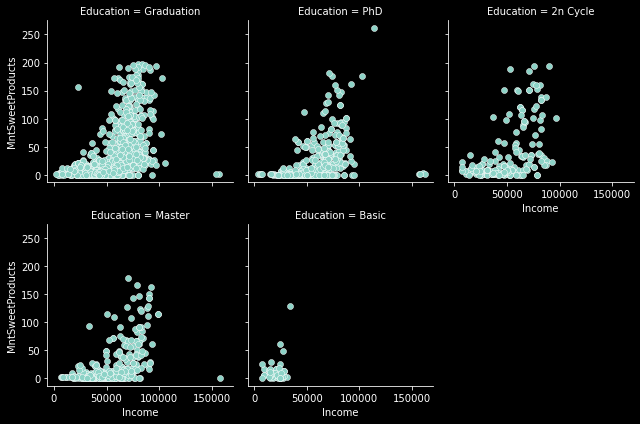

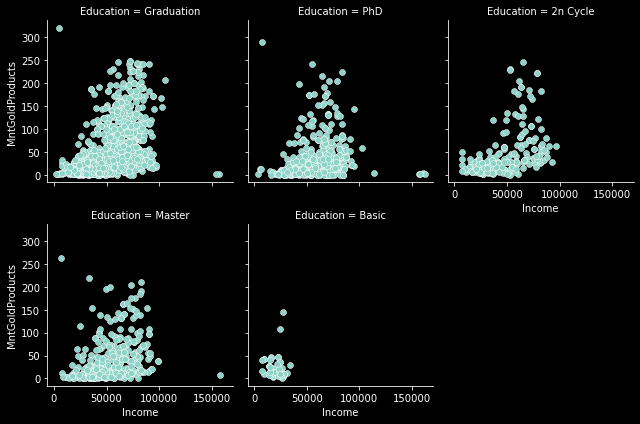

In [22]:
variable_names = {}

for i in range(6):
    # defining the facet grid
    variable_names["g{0}".format(i)] = sns.FacetGrid(df, col="Education", col_wrap=3)
    # mapping the facet grid with scatterplots of amounts product vs. income
    variable_names["g{0}".format(i)].map(sns.scatterplot, "Income", amounts[i])
plt.show()

#### Age Grouping
We'd like to know how many of what products each age group buys.

In [32]:
def age_groups(age):
    if 18 <= age <= 35 : 
        return '18 to 35' 
    elif 35 < age <= 50 : 
        return '36 to 50'
    elif 50 < age <= 70 : 
        return '51 to 70'
    else : 
        return '71 and Older'

dfa['age_group'] = dfa['Age'].apply(age_groups)

In [36]:
aa = dfa.loc[:, ('age_group', "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProducts")]
last = aa.groupby("age_group").sum().reset_index()
last

,age_group,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts
0,18 to 35,50848,6060,41221,8009,6201,8376
1,36 to 50,217317,20563,126795,29709,21753,34345
2,51 to 70,347306,27460,171663,39158,27464,48683
3,71 and Older,59825,4158,29791,6403,4409,5760


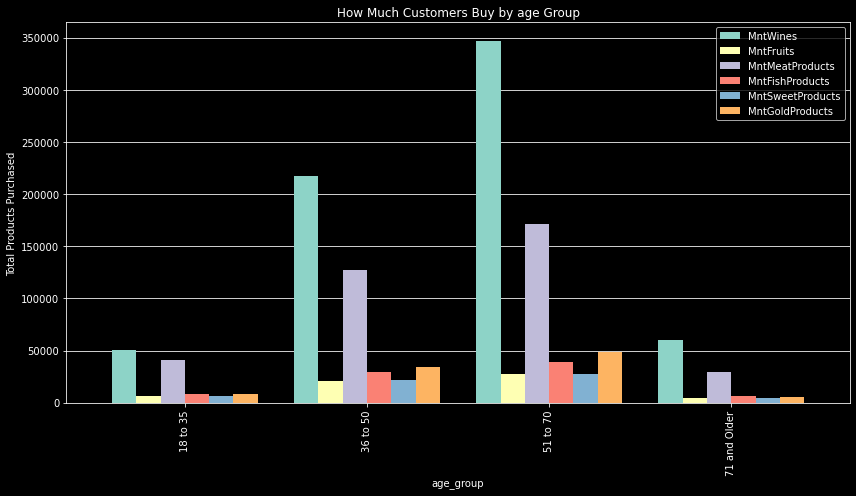

In [82]:
fig, ax= plt.subplots(figsize=(12,7))

last.plot(x='age_group', y=amounts, kind="bar", ax=ax, width =0.8)
plt.title("How Much Customers Buy by age Group")
plt.ylabel("Total Products Purchased")
plt.grid(axis="y")
ax.set_axisbelow(True)
plt.tight_layout()